# Statistics

1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [138]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def get_mean(nums):
    total = 0
    for i in nums:
        total += i
    return total / len(nums)

def get_variance(nums):
    mean = get_mean(nums)
    var = 0
    for i in nums:
        var += (i - mean)**2
    return var / len(nums)

def get_standard_dev(nums):
    import math
    var = get_variance(nums)
    return math.sqrt(var)

mean = get_mean(sales)
var = get_variance(sales)
st_dev = get_standard_dev(sales)

print(mean, var, st_dev)

3052.714285714286 183761.06122448976 428.67360686714756


In [139]:
import numpy as np

Check with numpy functions

In [140]:
np.mean(sales)

3052.714285714286

In [141]:
np.var(sales)

183761.06122448976

In [142]:
np.std(sales)

428.67360686714756

1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [143]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

In [144]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [152]:
get_standard_dev(sales), get_standard_dev(customers), get_standard_dev(sales)*get_standard_dev(customers)

(428.67360686714756, 15.792015549069118, 6769.620265121536)

In [153]:
import statistics

In [160]:
numpy_stdev_default = np.std(customers)*np.std(sales)
numpy_stdev_ddof = np.std(customers, ddof=1)*np.std(sales, ddof=1)
stat_stdev = statistics.stdev(customers)*statistics.stdev(sales)

print('Default Numpy Stdev: ', numpy_stdev_default)
print('Default Numpy DDOF=1: ', numpy_stdev_ddof)
print('Default Stat Stdev: ', stat_stdev)

Default Numpy Stdev:  6769.620265121536
Default Numpy DDOF=1:  7897.890309308459
Default Stat Stdev:  7897.89030930846


In [157]:
#st_dev_product = (get_standard_dev(sales) * get_standard_dev(customers))
st_dev_product = statistics.stdev(customers)*statistics.stdev(sales)
cov_vals = np.cov(sales, customers)

In [156]:
print(cov_vals / st_dev_product)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


In [148]:
# Target
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [47]:
import pandas as pd

In [49]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)

In [50]:
df.shape

(1310, 16)

In [53]:
df.head(1)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1


In [56]:
numeric = df.select_dtypes(include=[np.number])
numeric = numeric.drop(columns='body')
numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [62]:
numeric = numeric.dropna()

In [63]:
np.cov(numeric)

array([[  5435.13388114,   3879.82548373,   3879.5868192 , ...,
         -5347.84106585,  -5352.1715346 ,  -5340.04433594],
       [  3879.82548373,   2823.0782304 ,   2820.25878241, ...,
         -3316.66403674,  -3320.61105906,  -3316.44992076],
       [  3879.5868192 ,   2820.25878241,   2817.87174107, ...,
         -3151.84256696,  -3155.59837054,  -3151.05546875],
       ...,
       [ -5347.84106585,  -3316.66403674,  -3151.84256696, ...,
        211901.83445312, 212054.44896205, 212161.8234933 ],
       [ -5352.1715346 ,  -3320.61105906,  -3155.59837054, ...,
        212054.44896205, 212207.20186384, 212314.76434152],
       [ -5340.04433594,  -3316.44992076,  -3151.05546875, ...,
        212161.8234933 , 212314.76434152, 212422.86356027]])

# Orthogonality

2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?
- A synonym for orthogonal is perpendicular.

In [65]:
import matplotlib.pyplot as plt

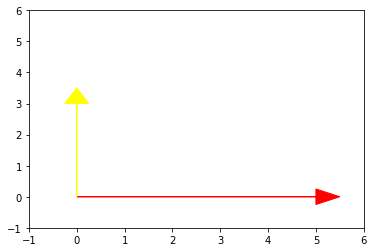

In [69]:
v_1 = [5,0]
v_2 = [0,3]

plt.arrow(0,0,v_1[0],v_1[1], head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0,v_2[0],v_2[1], head_width=.5, head_length=0.5, color ='yellow')

plt.xlim(-1, 6)
plt.ylim(-1,6)
plt.show()

2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [73]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a, b)

-40

In [76]:
#without built-in libraries
def get_dot_product(a,b):
    sum = 0
    for i in range(len(a)):
        sum += a[i]*b[i]
    return sum

get_dot_product(a,b)

-40

They are not orthogonal because there dot product is not equal to zero. 

2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [77]:
c = [2, -15, 6, 20]

In [80]:
from numpy import linalg

In [81]:
# find the norm of c and then square it
linalg.norm(c)**2

665.0

In [82]:
# Find dot product of c . c
np.dot(c,c)

665

In [87]:
# multiply c times the transpose of c (which has no effect on 1d arrays)
np.matmul(c, np.transpose(c))

665

All of the values are the same. This is true becasue the square of the norm of a vector is equivalent to the dot product of a vector with itself. Further, the dot product of a vector and itself can be rewritten as that vector times the transpose of itself.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
c = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
c = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [100]:
f = [4, 12, 11, 9, 2]
fhat = f / linalg.norm(f)
fhat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

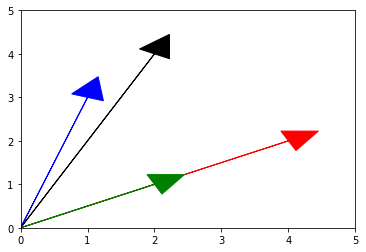

In [103]:
#Linearly dependent
a = [4,2]
b = [2,1]

#linearly independent
c = [2, 4]
d = [1, 3]

#Linearly dependent
plt.arrow(0,0,a[0],a[1], head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0,b[0],b[1], head_width=.5, head_length=0.5, color ='green')

#linearly independent
plt.arrow(0,0,c[0],c[1], head_width=.5, head_length=0.5, color ='black')
plt.arrow(0,0,d[0],d[1], head_width=.5, head_length=0.5, color ='blue')

plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(0, 10)

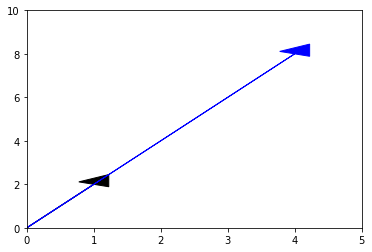

In [107]:
g = [1, 2]
h = [4, 8]

plt.arrow(0,0,g[0],g[1], head_width=.5, head_length=0.5, color ='black')
plt.arrow(0,0,h[0],h[1], head_width=.5, head_length=0.5, color ='blue')
plt.xlim(0,5)
plt.ylim(0,10)

The span of vectors g and h is the linear line that they both exist on. The vectors are linearly dependent. 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

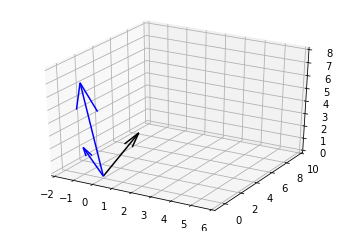

In [113]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.quiver(0,0,0,l[0],l[1],l[2], color ='black')
plt.quiver(0,0,0,m[0],m[1],m[2], color ='blue')
plt.quiver(0,0,0,m[0],m[1],n[2], color ='blue')
ax.set_xlim(-2,6)
ax.set_ylim(-1,10)
ax.set_zlim(0,8)

plt.show()

The span of these three vectors is all possible points as together the three vectors are linearly independent. Together they span the space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



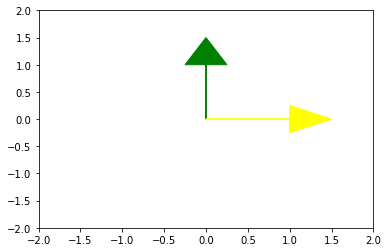

In [117]:
a = [0,1]
b = [1,0]

plt.arrow(0,0,a[0],a[1], head_width=.5, head_length=0.5, color ='green')
plt.arrow(0,0,b[0],b[1], head_width=.5, head_length=0.5, color ='yellow')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()

## 6.2 What does it mean to form a basis?

 A basis of a vector space is a set of vectors that are linearly independent and that span the vector space.
 
 Essentially a basis is a set of vectors whose linear combinations fill the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [120]:
P = np.array([[1,2,3],
            [-1,0,7],
            [4,8,2]])
linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us about the span of the matrix. Since matrix P has a rank of 3 it can span R^3. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [129]:
v = [1, 3]
w = [-1, 2]

numerator = get_dot_product(w, v) 
denominator = get_dot_product(v, v)
proj_w = np.multiply((numerator / denominator),v)
proj_w

array([0.5, 1.5])

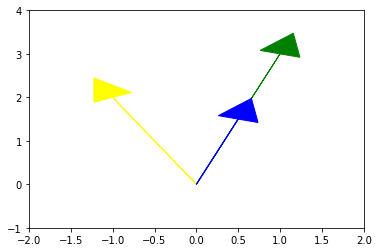

In [127]:
v = [1,3]
w = [-1, 2]
proj = [0.5,1.5]

plt.arrow(0,0,v[0],v[1], head_width=.5, head_length=0.5, color ='green')
plt.arrow(0,0,w[0],w[1], head_width=.5, head_length=0.5, color ='yellow')
plt.arrow(0,0,proj[0],proj[1], head_width=.5, head_length=0.5, color ='blue')

plt.xlim(-2,2)
plt.ylim(-1, 4)

plt.show()

# Stretch Goal

For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

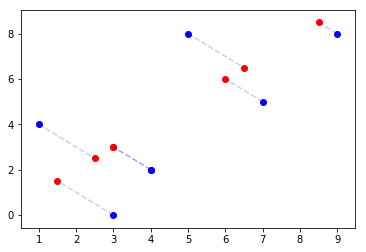

In [189]:
def get_dot_product(a,b):
    sum = 0
    for i in range(len(a)):
        sum += a[i]*b[i]
    return sum

def get_projection(v1, v2=np.array([4,4])):
    import numpy as np
    proj = np.multiply( (get_dot_product(v1, v2) / get_dot_product(v2, v2) ), v2)
    return proj

def add_projection(df, x_col, y_col):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    for i in range(len(df)):
        # Convert x and y values to vector
        v1 = np.array([df[x_col][i],df[y_col][i]])
        # Calculate projection vector
        proj = get_projection(v1)
        # Plot projection vector (represented as points)
        plt.scatter(proj[0], proj[1], color='r')
        # Plot line between vector and projection points
        plt.plot([ df[x_col][i], proj[0] ], [ df[y_col][i] , proj[1] ], alpha=0.2, color='b', linestyle='--')
    #plot x and y values
    plt.scatter(df[x_col],df[y_col], color='b')
    #Show plot
    plt.show()
    
add_projection(df, 'x', 'y')